In [1]:
import pandas as pd
import numpy as np

In [2]:
dataframe=pd.read_csv("Trump label project.csv", header=0, names=['x','text','date','label'])

In [3]:
dataframe.head()

,x,text,date,label
0,0,linkedin workforce report january february str...,03/08/2017,1
1,1,international women day join honoring critical...,03/08/2017,0
2,2,tremendous respect women many roles serve vita...,03/08/2017,0
3,3,feel sure friend come along new great health c...,03/08/2017,0
4,4,let fake news tell big infighting trump admin ...,03/07/2017,1


In [4]:
dataframe=dataframe.drop("x",axis=1)

In [5]:
dataframe.head()

,text,date,label
0,linkedin workforce report january february str...,03/08/2017,1
1,international women day join honoring critical...,03/08/2017,0
2,tremendous respect women many roles serve vita...,03/08/2017,0
3,feel sure friend come along new great health c...,03/08/2017,0
4,let fake news tell big infighting trump admin ...,03/07/2017,1


In [ ]:
"""""from sklearn.utils import shuffle
dataframe_s = shuffle(dataframe)

In [ ]:
dataframe.dtypes

In [ ]:
""""max_value=max(dataframe['approval'])
min_value=min(dataframe['approval'])
one_third=(max_value-min_value)/3"""

In [ ]:
"""def labeller(value):
    if value<=(min_value+one_third):
        return 0
    elif value>(min_value+one_third) and value<(max_value-one_third):
        return 1
    else:
        return 2"""

In [ ]:
#dataframe['new_label']=dataframe['approval'].apply(labeller)

In [ ]:
#print(dataframe.groupby(by='new_label').count())

In [ ]:
""""for idx, row in dataframe_s.iterrows():
    if  dataframe_s.loc[idx,'label'] == -2:
        dataframe_s.loc[idx,'new'] = 0
    elif  dataframe_s.loc[idx,'label'] == -1:
        dataframe_s.loc[idx,'new'] = 0
    elif  dataframe_s.loc[idx,'label'] == 0:
        dataframe_s.loc[idx,'new'] = 1
    elif  dataframe_s.loc[idx,'label'] == 1:
        dataframe_s.loc[idx,'new'] = 1
    elif  dataframe_s.loc[idx,'label'] == 2:
        dataframe_s.loc[idx,'new'] = 1

In [6]:
print(dataframe)

                                                   text        date  label
0     linkedin workforce report january february str...  03/08/2017      1
1     international women day join honoring critical...  03/08/2017      0
2     tremendous respect women many roles serve vita...  03/08/2017      0
3     feel sure friend come along new great health c...  03/08/2017      0
4     let fake news tell big infighting trump admin ...  03/07/2017      1
5     working new system competition drug industry p...  03/07/2017      1
6     worry getting rid state lines promote competit...  03/07/2017      1
7     eight years russia ran president obama got str...  03/07/2017      1
8     wonderful new healthcare bill review negotiati...  03/07/2017      1
9     vicious prisoners released obama administratio...  03/07/2017      1
10    thank billion investment creating manufacturin...  03/07/2017      0
11    buy american hire american principles core age...  03/07/2017      0
12    incredible spirit o

In [7]:
from sklearn.utils import shuffle
df = shuffle(dataframe, random_state=123)

In [8]:
df.head()

,text,date,label
2785,thank maryland trump,04/27/2016,0
3507,join oklahoma tomorrow night makeyoutubegreata...,02/25/2016,0
1672,limited edition signed copies book art deal do...,08/06/2016,0
4321,one biggest fans mr trump wait make america gr...,01/01/2016,1
1260,hillary clinton points ahead debatenight,09/27/2016,0


In [9]:
#print (df.shape) #Take the first number from X_data.shape and store it in num_of_rows
num_of_rows = int((df.shape[0]) * 0.8)

train_data = df.iloc[:num_of_rows] #indexes rows for training data
test_data = df.iloc[num_of_rows:] #indexes rows for test data

In [10]:
df=df.drop("date",axis=1)

In [11]:
train_data=train_data.dropna()

In [12]:
test_data=test_data.dropna()

In [ ]:
#train=train.drop(columns=['Date'])

In [ ]:
#train['label']=train['label']+2

In [ ]:
#test=test.dropna()
#test['label']=test['label']+2

In [13]:
import tensorflow as tf

In [14]:
#!pip install tensorflow_hub
import tensorflow_hub as hub

In [16]:
# Training input on the whole training set with no limit on training epochs.
train_input_fn = tf.estimator.inputs.pandas_input_fn(train_data, train_data['label'], num_epochs=None, shuffle=True)

# Prediction on the whole training set.
predict_train_input_fn = tf.estimator.inputs.pandas_input_fn(train_data, train_data["label"], shuffle=False)
# Prediction on the test set.
predict_test_input_fn = tf.estimator.inputs.pandas_input_fn(test_data, test_data["label"], shuffle=False)

In [15]:
#train_input_fn=tf.estimator.inputs.pandas_input_fn(train_data, train_data['label'],num_epochs=1000, shuffle=True)

In [ ]:
#train_input_fn

In [16]:
#eval_input_fn=tf.estimator.inputs.pandas_input_fn(test_data, test_data['label'],num_epochs=1000, shuffle=True)
#predict_train_input_fn=tf.estimator.inputs.pandas_input_fn(train, train['new_label'],shuffle=False)

In [16]:
#predict_test_input_fn=tf.estimator.inputs.pandas_input_fn(test_data,test_data['label'],shuffle=False)

In [17]:
run_config=tf.estimator.RunConfig(keep_checkpoint_max=1)


In [18]:
embedded_text_feature_column=hub.text_embedding_column(key='text',module_spec='https://tfhub.dev/google/nnlm-en-dim128/1',trainable=True)

INFO:tensorflow:Using C:\Users\Admin\AppData\Local\Temp\tfhub_modules to cache modules.


In [19]:
estimator=tf.estimator.DNNClassifier(
    hidden_units=[200,50,50],
    feature_columns=[embedded_text_feature_column],
    n_classes=2,
    config=run_config,
    optimizer=tf.train.AdagradOptimizer(learning_rate=0.0005))

INFO:tensorflow:Using config: {'_model_dir': 'C:\\Users\\Admin\\AppData\\Local\\Temp\\tmpe24jhwlq', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': None, '_keep_checkpoint_max': 1, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x00000196318FFF28>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [20]:
estimator.train(input_fn=train_input_fn,steps=7000)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Saver not created because there are no variables in the graph to restore
INFO:tensorflow:Saver not created because there are no variables in the graph to restore
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 0 into C:\Users\Admin\AppData\Local\Temp\tmpe24jhwlq\model.ckpt.
INFO:tensorflow:loss = 88.710526, step = 0
INFO:tensorflow:global_step/sec: 148.232
INFO:tensorflow:loss = 83.97154, step = 100 (0.691 sec)
INFO:tensorflow:global_step/sec: 193.902
INFO:tensorflow:loss = 81.225586, step = 200 (0.499 sec)
INFO:tensorflow:global_step/sec: 192.953
INFO:tensorflow:loss = 75.0348, step = 300 (0.518 sec)
INFO:tensorflow:global_step/sec: 192.095
INFO:tensorflow:loss = 71.90546, step = 400 (0.522 sec)
INFO:tensorflow:global_step/sec: 198.721
INFO:tens

In [21]:
train_eval_result = estimator.evaluate(input_fn=predict_train_input_fn)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Saver not created because there are no variables in the graph to restore
INFO:tensorflow:Saver not created because there are no variables in the graph to restore
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2018-12-06-15:54:25
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\Admin\AppData\Local\Temp\tmpe24jhwlq\model.ckpt-7000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2018-12-06-15:54:27
INFO:tensorflow:Saving dict for global step 7000: accuracy = 0.98440206, accuracy_baseline = 0.5418833, auc = 0.99764025, auc_precision_recall = 0.9976198, average_loss = 0.06640708, global_step = 7000, label/mean = 0.4581167, loss = 8.210761, precision = 0.98358583, prediction/mean = 0.4584361, recall = 0.9823455
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 7000: C:\Users\Admin\AppDa

In [22]:
print("Training Accuracy: {accuracy}".format(**train_eval_result))

Training Accuracy: 0.984402060508728


In [23]:
test_eval_result=estimator.evaluate(input_fn=predict_test_input_fn)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Saver not created because there are no variables in the graph to restore
INFO:tensorflow:Saver not created because there are no variables in the graph to restore
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2018-12-06-15:54:34
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\Admin\AppData\Local\Temp\tmpe24jhwlq\model.ckpt-7000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2018-12-06-15:54:36
INFO:tensorflow:Saving dict for global step 7000: accuracy = 0.7739331, accuracy_baseline = 0.51557094, auc = 0.85065246, auc_precision_recall = 0.8362243, average_loss = 0.6666684, global_step = 7000, label/mean = 0.48442906, loss = 82.57165, precision = 0.7758621, prediction/mean = 0.46101257, recall = 0.75
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 7000: C:\Users\Admin\AppData\Lo

In [24]:
print("Test Training Accuracy: {accuracy}".format(**test_eval_result))

Test Training Accuracy: 0.7739331126213074


In [25]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Saver not created because there are no variables in the graph to restore
INFO:tensorflow:Saver not created because there are no variables in the graph to restore
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\Admin\AppData\Local\Temp\tmpe24jhwlq\model.ckpt-7000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


Text(33.0, 0.5, 'True')

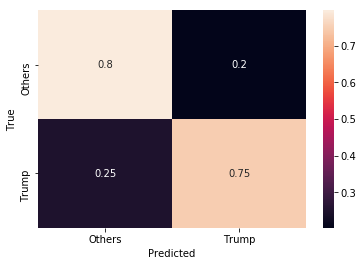

In [26]:
def get_predictions(estimator, input_fn):
  return [x["class_ids"][0] for x in estimator.predict(input_fn=input_fn)]

# Create a confusion matrix on training data.
with tf.Graph().as_default():
  cm = tf.confusion_matrix(test_data["label"],
                           get_predictions(estimator, predict_test_input_fn))
  with tf.Session() as session:
    cm_out = session.run(cm)

# Normalize the confusion matrix so that each row sums to 1.
cm_out = cm_out.astype(float) / cm_out.sum(axis=1)[:, np.newaxis]

sns.heatmap(
    cm_out,
    annot=True,
    xticklabels=['Others','Trump'],
    yticklabels=['Others','Trump'])
plt.xlabel("Predicted")
plt.ylabel("True")

In [77]:
new_tweets=pd.read_csv('C://Users//Admin//Yidu AI//Predict Data.csv', encoding='utf-8')

In [78]:
Dates=pd.DataFrame()
Dates=new_tweets['Date']
new_tweets.drop(['Unnamed: 0', 'Date'], axis=1, inplace=True)

In [79]:
Dates

0      11/30/2018
1      11/30/2018
2      11/30/2018
3      11/30/2018
4      11/30/2018
5      11/30/2018
6      11/30/2018
7      11/30/2018
8      11/30/2018
9      11/29/2018
10     11/29/2018
11     11/29/2018
12     11/29/2018
13     11/29/2018
14     11/29/2018
15     11/29/2018
16     11/29/2018
17     11/29/2018
18     11/29/2018
19     11/29/2018
20     11/29/2018
21     11/29/2018
22     11/29/2018
23     11/28/2018
24     11/28/2018
25     11/28/2018
26     11/28/2018
27     11/28/2018
28     11/28/2018
29     11/28/2018
          ...    
571    10/03/2018
572    10/03/2018
573    10/03/2018
574    10/03/2018
575    10/03/2018
576    10/03/2018
577    10/03/2018
578    10/03/2018
579    10/03/2018
580    10/03/2018
581    10/03/2018
582    10/03/2018
583    10/02/2018
584    10/02/2018
585    10/02/2018
586    10/02/2018
587    10/02/2018
588    10/02/2018
589    10/02/2018
590    10/02/2018
591    10/02/2018
592    10/02/2018
593    10/01/2018
594    10/01/2018
595    10/

In [82]:
predict_input_fn = tf.estimator.inputs.pandas_input_fn(
    x=new_tweets,
    num_epochs=1,
    shuffle=False)

In [80]:
new_tweets=new_tweets.dropna()

In [81]:
new_tweets['label']=""

In [85]:
predictions = estimator.predict(input_fn=predict_input_fn)
for i, p in enumerate(predictions):
  print("Prediction %s: %s" % (i + 1, p['class_ids']))

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Saver not created because there are no variables in the graph to restore
INFO:tensorflow:Saver not created because there are no variables in the graph to restore
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\Admin\AppData\Local\Temp\tmpe24jhwlq\model.ckpt-7000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Prediction 1: [1]
Prediction 2: [0]
Prediction 3: [1]
Prediction 4: [1]
Prediction 5: [1]
Prediction 6: [0]
Prediction 7: [1]
Prediction 8: [1]
Prediction 9: [0]
Prediction 10: [0]
Prediction 11: [1]
Prediction 12: [1]
Prediction 13: [0]
Prediction 14: [0]
Prediction 15: [1]
Prediction 16: [0]
Prediction 17: [1]
Prediction 18: [1]
Prediction 19: [1]
Prediction 20: [1]
Prediction 21: [1]
Prediction 22: [1]
Prediction 23: [1]
Prediction 24: [0]
Prediction 25: [1]
Prediction 26: [1]
Prediction 27: [1]
Prediction 28: [1]
Pr

In [86]:
new_pred=[]
for i, p in enumerate(predictions):
   new_pred.append(p['class_ids'])

In [91]:
new_tweets

,text,label
0,signed one important largest trade deals u wor...,
1,usmca,
2,lightly looked building somewhere russia put z...,
3,oh get good developer happily living life see ...,
4,arrived argentina busy two days planned import...,
5,alan dershowitz crimes mueller authority rovin...,
6,demonstrates robert mueller partisans evidence...,
7,landed argentina melania g summit,
8,rnc chair ronna mcdaniel oversaw history defyi...,
9,working hard going get better,


In [ ]:
predicted=get_predictions(estimator, predict_test_input_fn)

In [ ]:
final_table=pd.DataFrame()

In [ ]:
final_table = pd.DataFrame({'text':test['text'],'actual':test['new_label'],'predicted': predicted})

In [ ]:
final_table

In [ ]:
from IPython.display import clear_output, Image, display, HTML

def strip_consts(graph_def, max_const_size=32):
    """Strip large constant values from graph_def."""
    strip_def = tf.GraphDef()
    for n0 in graph_def.node:
        n = strip_def.node.add() 
        n.MergeFrom(n0)
        if n.op == 'Const':
            tensor = n.attr['value'].tensor
            size = len(tensor.tensor_content)
            if size > max_const_size:
                tensor.tensor_content = "<stripped %d bytes>"%size
    return strip_def

def show_graph(graph_def, max_const_size=32):
    """Visualize TensorFlow graph."""
    if hasattr(graph_def, 'as_graph_def'):
        graph_def = graph_def.as_graph_def()
    strip_def = strip_consts(graph_def, max_const_size=max_const_size)
    code = """
        <script>
          function load() {{
            document.getElementById("{id}").pbtxt = {data};
          }}
        </script>
        <link rel="import" href="https://tensorboard.appspot.com/tf-graph-basic.build.html" onload=load()>
        <div style="height:600px">
          <tf-graph-basic id="{id}"></tf-graph-basic>
        </div>
    """.format(data=repr(str(strip_def)), id='graph'+str(np.random.rand()))

    iframe = """
        <iframe seamless style="width:1200px;height:620px;border:0" srcdoc="{}"></iframe>
    """.format(code.replace('"', '&quot;'))
    display(HTML(iframe))

In [ ]:
gdef = tf.GraphDef()
from google.protobuf import text_format
text_format.Merge(open("./output/graph.pbtxt").read(), gdef)
show_graph(gdef)